# Proposition 64 Analysis - Marijuana Legalization in California

The objective of this document is to analyze spending by committees and individuals toward ballot initiative 64 during the 2016 general election in the state of California. Ballot initiative 64 asked if marijuana should be legalized for recreational use in the state. 

In [26]:
import pandas as pd
%matplotlib inline

At first we read in the list of proposition and committees from the csv. We then we read in the list of contributions from individuals toward committees supporting or opposing ballot measures.

In [27]:
props = pd.read_csv("https://first-python-notebook.readthedocs.io/_static/committees.csv")

In [28]:
contribs = pd.read_csv("https://first-python-notebook.readthedocs.io/_static/contributions.csv")

Here we are isolating proposition 64 from the dataset.

In [29]:
prop = props[props.prop_name == 'PROPOSITION 064- MARIJUANA LEGALIZATION. INITIATIVE STATUTE.']

The aim here is to create a single table that merges data from the props and contribs table. The result is a table that shows to which committees individual donors contributed to and how much that contribution was.

In [30]:
merged = pd.merge(prop, contribs, on="calaccess_committee_id")

Here we isolate persons who are in support of the proposition.

In [31]:
support = merged[merged.committee_position == 'SUPPORT']

The table below shows the top five contributors toward committees in support of the proposition.

In [32]:
top_supporters = support.groupby(["contributor_firstname", "contributor_lastname"]).amount.sum().reset_index().sort_values("amount", ascending=False)
top_supporters['contributor_fullname'] = top_supporters.contributor_firstname + " " + top_supporters.contributor_lastname
top_supporters.head()

,contributor_firstname,contributor_lastname,amount,contributor_fullname
444,SEAN,PARKER AND AFFILIATED ENTITIES,7250000.0,SEAN PARKER AND AFFILIATED ENTITIES
443,SEAN,PARKER,1500000.0,SEAN PARKER
102,DANIEL,LEWIS,1250000.0,DANIEL LEWIS
180,HENRY,VAN AMERINGEN,1000000.0,HENRY VAN AMERINGEN
374,NICHOLAS,PRITZKER,900000.0,NICHOLAS PRITZKER


Here we create a bar chart showing the top five contributors in favor of the proposition

[Text(0, 0, 'SEAN PARKER AND AFFILIATED ENTITIES'),
 Text(0, 0, 'SEAN PARKER'),
 Text(0, 0, 'DANIEL LEWIS'),
 Text(0, 0, 'HENRY VAN AMERINGEN'),
 Text(0, 0, 'NICHOLAS PRITZKER')]

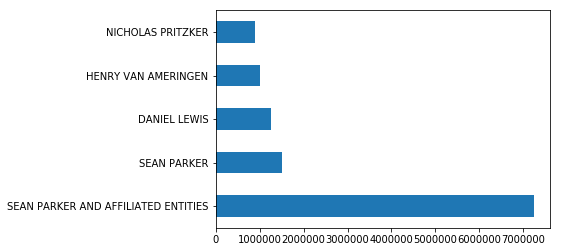

In [33]:
chart = top_supporters.head(5).amount.plot.barh()
chart.set_yticklabels(top_supporters.contributor_fullname)